In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
pd.options.display.max_columns = None


In [2]:
df=pd.read_csv("DATOS_LIMPIOS.csv")

In [3]:
from collections import Counter

import pandas as pd

from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, plot_confusion_matrix

In [4]:
df

,Unnamed: 0,course_id,grade,online_progress,user_id,category,hours,mdl_user_id,planta_name,1er acceso,ultimo acceso,planta_id,language_es
0,0,224,0.00,0.0,138,27,0.0,183,ABP Arrasate,"lunes, 4 de mayo de 2020, 17:04","martes, 13 de julio de 2021, 15:10",2,1
1,1,224,9.32,0.0,262,27,0.0,296,ABP Arrasate,"viernes, 18 de diciembre de 2020, 14:44","viernes, 1 de octubre de 2021, 15:56",2,1
2,2,224,9.66,0.0,265,27,0.0,299,ABP Arrasate,"viernes, 18 de diciembre de 2020, 16:18","viernes, 18 de diciembre de 2020, 17:01",2,1
3,6,223,8.85,0.0,262,27,0.0,296,ABP Arrasate,"viernes, 18 de diciembre de 2020, 14:44","viernes, 1 de octubre de 2021, 15:56",2,1
4,7,223,9.43,0.0,265,27,0.0,299,ABP Arrasate,"viernes, 18 de diciembre de 2020, 16:18","viernes, 18 de diciembre de 2020, 17:01",2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,3865,193,9.97,100.0,187,27,10.0,231,ABP Bergara,"jueves, 1 de octubre de 2020, 11:49","martes, 14 de septiembre de 2021, 13:27",1,1
1155,3885,278,0.00,0.0,10,44,0.0,21,LPP Eskoriatza,"martes, 2 de octubre de 2018, 22:08","viernes, 9 de julio de 2021, 12:18",8,1
1156,3886,278,0.00,0.0,95,44,0.0,113,LPP Eskoriatza,"martes, 9 de julio de 2019, 14:14","viernes, 11 de junio de 2021, 11:34",8,1
1157,3887,278,10.00,40.0,314,44,0.0,339,LPP Eskoriatza,"viernes, 4 de junio de 2021, 10:57","lunes, 14 de junio de 2021, 10:14",8,1


In [5]:
df.columns

Index(['Unnamed: 0', 'course_id', 'grade', 'online_progress', 'user_id',
       'category', 'hours', 'mdl_user_id', 'planta_name', '1er acceso',
       'ultimo acceso', 'planta_id', 'language_es'],
      dtype='object')

In [6]:
df=df[[ 'course_id', 'grade', 'online_progress', 'user_id',
       'category', 'hours', 'planta_id', 'language_es']]

In [7]:
df

,course_id,grade,online_progress,user_id,category,hours,planta_id,language_es
0,224,0.00,0.0,138,27,0.0,2,1
1,224,9.32,0.0,262,27,0.0,2,1
2,224,9.66,0.0,265,27,0.0,2,1
3,223,8.85,0.0,262,27,0.0,2,1
4,223,9.43,0.0,265,27,0.0,2,1
...,...,...,...,...,...,...,...,...
1154,193,9.97,100.0,187,27,10.0,1,1
1155,278,0.00,0.0,10,44,0.0,8,1
1156,278,0.00,0.0,95,44,0.0,8,1
1157,278,10.00,40.0,314,44,0.0,8,1


In [8]:
# df=df[["hours","planta_id","grade"]]
#df=df[["online_progress","planta_id","grade"]]

In [9]:
# df=df[""]

In [10]:
df=df.dropna(0)

In [11]:
df.isna().sum()

course_id          0
grade              0
online_progress    0
user_id            0
category           0
hours              0
planta_id          0
language_es        0
dtype: int64

In [12]:
df

,course_id,grade,online_progress,user_id,category,hours,planta_id,language_es
0,224,0.00,0.0,138,27,0.0,2,1
1,224,9.32,0.0,262,27,0.0,2,1
2,224,9.66,0.0,265,27,0.0,2,1
3,223,8.85,0.0,262,27,0.0,2,1
4,223,9.43,0.0,265,27,0.0,2,1
...,...,...,...,...,...,...,...,...
1154,193,9.97,100.0,187,27,10.0,1,1
1155,278,0.00,0.0,10,44,0.0,8,1
1156,278,0.00,0.0,95,44,0.0,8,1
1157,278,10.00,40.0,314,44,0.0,8,1


In [13]:
df['grade'] = np.where(df['grade'] > 5, 1, 0)


In [14]:
df.shape

(1159, 8)

In [15]:
df.shape

(1159, 8)

In [16]:
df

,course_id,grade,online_progress,user_id,category,hours,planta_id,language_es
0,224,0,0.0,138,27,0.0,2,1
1,224,1,0.0,262,27,0.0,2,1
2,224,1,0.0,265,27,0.0,2,1
3,223,1,0.0,262,27,0.0,2,1
4,223,1,0.0,265,27,0.0,2,1
...,...,...,...,...,...,...,...,...
1154,193,1,100.0,187,27,10.0,1,1
1155,278,0,0.0,10,44,0.0,8,1
1156,278,0,0.0,95,44,0.0,8,1
1157,278,1,40.0,314,44,0.0,8,1


# LOGISTIC REGRESSION

In [17]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [18]:
df10=df.copy()

In [19]:
# df['grade'] = np.where(df['grade'] > 5, 1, 0)


In [20]:
df.shape

(1159, 8)

In [21]:

print("Número de observaciones por clase")
print(df['grade'].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * df['grade'].value_counts(normalize=True))

Número de observaciones por clase
1    705
0    454
Name: grade, dtype: int64

Porcentaje de observaciones por clase
1    60.8283
0    39.1717
Name: grade, dtype: float64


In [22]:
# División de los datos en train y test
# ==============================================================================
X = df.drop(columns = 'grade')
y = df['grade']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [23]:
X_train.shape

(927, 7)

In [24]:
df.duplicated().sum()

3

In [25]:
df.isna().sum()

course_id          0
grade              0
online_progress    0
user_id            0
category           0
hours              0
planta_id          0
language_es        0
dtype: int64

In [26]:
df.shape

(1159, 8)

In [27]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.563276
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  927
Model:                          Logit   Df Residuals:                      919
Method:                           MLE   Df Model:                            7
Date:                Sat, 22 Jan 2022   Pseudo R-squ.:                  0.1615
Time:                        15:46:51   Log-Likelihood:                -522.16
converged:                       True   LL-Null:                       -622.73
Covariance Type:            nonrobust   LLR p-value:                 6.570e-40
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3320      0.729      0.456      0.649      -1.096       1.760
course_id     

In [28]:
# Accuracy de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 70.6896551724138%


In [29]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,38,48
1,20,126


# NAIVE BAYES

In [30]:
condiciones= [
    (df.grade.lt(2)),
    (df.grade.ge(3) & df.grade.lt(5)),
    (df.grade.ge(6) & df.grade.lt(8)),
    (df.grade.ge(10))
]

opciones= ["0","1","2","3"]
df["grado"]=np.select(condiciones,opciones)

In [31]:
import pandas as pd
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

In [32]:
df.shape

(1159, 9)

In [33]:
df10_1=df.iloc[:,1:]
df10_2=df["grade"].reset_index()

In [34]:
df10_2=df10_2.set_index("index")

In [35]:
df10_2.head()

,grade
index,
0,0
1,1
2,1
3,1
4,1


In [36]:
gnb=GaussianNB() #MultinomialNB/BernoulliNB
pred=gnb.fit(df10_1, df10_2)
y_pred=pred.predict(df10_1)

In [37]:
#print(df10_1.shape[0],(df10_2 != y_pred).sum())

Number of mislabeled points out of a total 1159 points : 640140
Accuracy:1.000


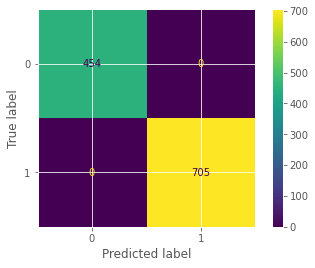

In [38]:
from sklearn import datasets
iris = datasets.load_iris()

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score

gnb = BernoulliNB()
y_pred = gnb.fit(df10_1, df10_2).predict(df10_1)
scores=cross_val_score(gnb,df10_1,df10_2,cv=10)

print("Number of mislabeled points out of a total %d points : %d"
      % (df10_1.shape[0],(df10_2.values != y_pred).sum()))
plot_confusion_matrix(gnb, df10_1, df10_2)
print("Accuracy:%.3f"%scores.mean())


In [39]:
from sklearn.metrics import classification_report

print(classification_report(df10_2, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       454
           1       1.00      1.00      1.00       705

    accuracy                           1.00      1159
   macro avg       1.00      1.00      1.00      1159
weighted avg       1.00      1.00      1.00      1159



Number of mislabeled points out of a total 1159 points : 707408
Accuracy:0.549


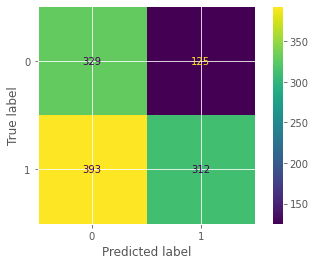

In [40]:
from sklearn import datasets
iris = datasets.load_iris()

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
y_pred = gnb.fit(df10_1, df10_2).predict(df10_1)
scores=cross_val_score(gnb,df10_1,df10_2,cv=10)

print("Number of mislabeled points out of a total %d points : %d"
      % (df10_1.shape[0],(df10_2.values != y_pred).sum()))
plot_confusion_matrix(gnb, df10_1, df10_2)
print("Accuracy:%.3f"%scores.mean())


In [41]:
from sklearn.metrics import classification_report

print(classification_report(df10_2, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.72      0.56       454
           1       0.71      0.44      0.55       705

    accuracy                           0.55      1159
   macro avg       0.58      0.58      0.55      1159
weighted avg       0.61      0.55      0.55      1159



Number of mislabeled points out of a total 1159 points : 640140
Accuracy:0.549


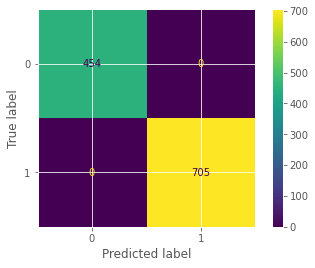

In [42]:
from sklearn import datasets

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(df10_1, df10_2).predict(df10_1)
print("Number of mislabeled points out of a total %d points : %d"
      % (df10_1.shape[0],(df10_2.values != y_pred).sum()))
confusion_matrix1=plot_confusion_matrix(gnb, df10_1, df10_2)
confusion_matrix1
print("Accuracy:%.3f"%scores.mean())


In [43]:
from sklearn.metrics import classification_report

print(classification_report(df10_2, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       454
           1       1.00      1.00      1.00       705

    accuracy                           1.00      1159
   macro avg       1.00      1.00      1.00      1159
weighted avg       1.00      1.00      1.00      1159



In [44]:
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [45]:
df10_2.values

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]])

# SUPER VECTOR MACHINE

In [46]:
df

,course_id,grade,online_progress,user_id,category,hours,planta_id,language_es,grado
0,224,0,0.0,138,27,0.0,2,1,0
1,224,1,0.0,262,27,0.0,2,1,0
2,224,1,0.0,265,27,0.0,2,1,0
3,223,1,0.0,262,27,0.0,2,1,0
4,223,1,0.0,265,27,0.0,2,1,0
...,...,...,...,...,...,...,...,...,...
1154,193,1,100.0,187,27,10.0,1,1,0
1155,278,0,0.0,10,44,0.0,8,1,0
1156,278,0,0.0,95,44,0.0,8,1,0
1157,278,1,40.0,314,44,0.0,8,1,0


In [47]:
df2=df[["planta_id","category"]]

In [48]:
df2.head()

,planta_id,category
0,2,27
1,2,27
2,2,27
3,2,27
4,2,27


In [49]:
df.dtypes

course_id            int64
grade                int32
online_progress    float64
user_id              int64
category             int64
hours              float64
planta_id            int64
language_es          int64
grado               object
dtype: object

In [50]:
df1.values

NameError: name 'df1' is not defined

In [ ]:
df1=df["grade"]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm



X = df2
y = df1

# Use only 2 classes and 2 variables
X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for fig_num, kernel in enumerate(['linear','rbf','poly']):
    clf = svm.SVC(kernel=kernel, gamma=10, degree=3)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Datos
# ==============================================================================
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/' \
       + 'Estadistica-machine-learning-python/master/data/ESL.mixture.csv'
datos = pd.read_csv(url)
datos.head(100)

In [ ]:
datos.y.values

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df.hours, df.planta_id, c=df.grade);
ax.set_title("Datos ESL.mixture");

In [ ]:
df.columns

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df.online_progress, df.planta_id, c=df.grade);
ax.set_title("Datos ESL.mixture");

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = df.drop(columns = 'grade')
y = df['grade']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)

In [ ]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.online_progress), np.max(X_train.online_progress), 50)
y = np.linspace(np.min(X_train.planta_id), np.max(X_train.planta_id), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.online_progress, X_train.planta_id, c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors = 'k',
    levels = [-1, 0, 1],
    alpha  = 0.5,
    linestyles = ['--', '-', '--']
)

ax.set_title("Resultados clasificación SVM lineal");

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)
predicciones

In [ ]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")